In [9]:
import networkx as nx
import matplotlib.pyplot as plt
from sage.all import *

In [10]:
CYCLE_LENGTH = 10 # length of the cycles to fit onto the graph

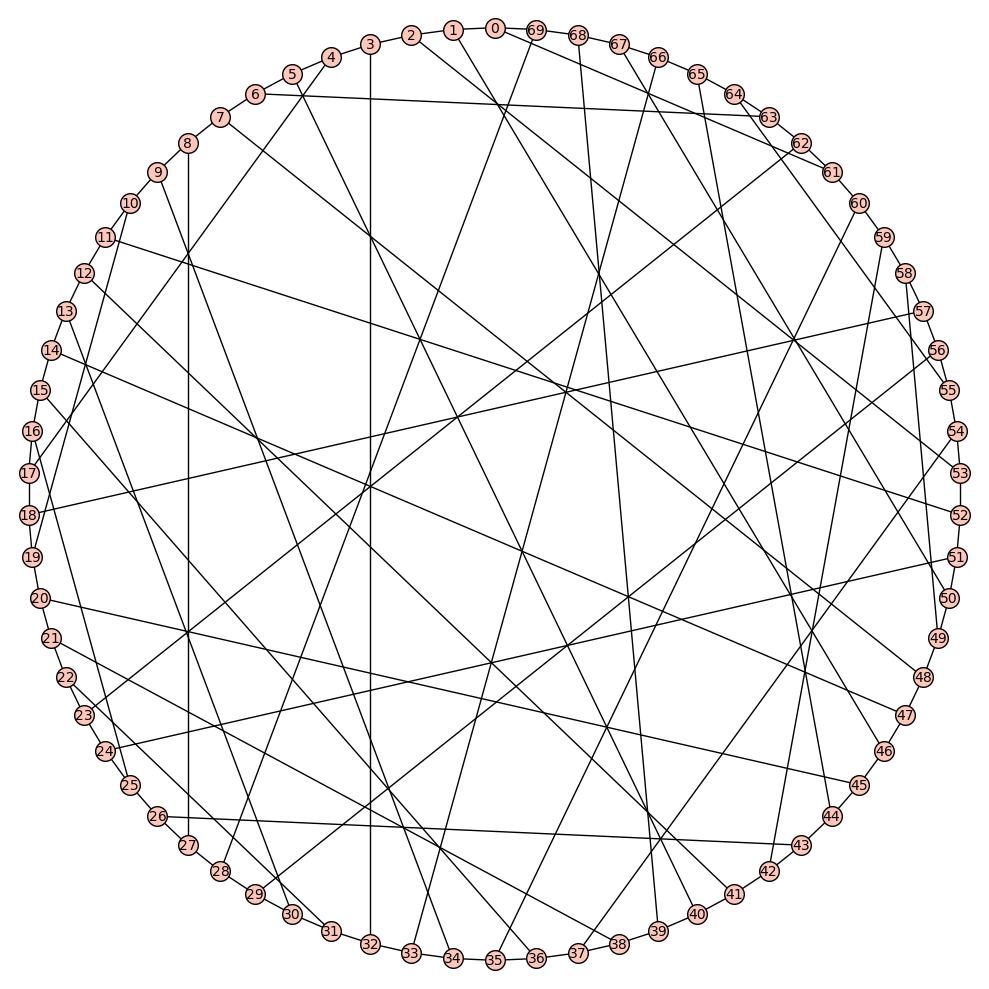

In [11]:
# instantiate a balaban 10-cage
g = graphs.Balaban10Cage(embedding=2)
g.show(figsize=(10,10))

In [12]:
# get the edges of the graph
NUM_EDGES = len(g.edges())
NUM_VERTICES = len(g.vertices())
print("NUM_EDGES", NUM_EDGES)
print("CYCLES TO FIT", 2 * NUM_EDGES / CYCLE_LENGTH)
print("NUM_VERTICES", NUM_VERTICES)

NUM_EDGES 105
CYCLES TO FIT 21
NUM_VERTICES 70


In [13]:
# convert edges list to adjacency list
adjacency_list = [[] for _ in range(NUM_VERTICES)]
for e in g.edges():
    adjacency_list[e[0]].append(e[1])
    adjacency_list[e[1]].append(e[0])
adjacency_list

[[1, 69, 61],
 [0, 2, 46],
 [1, 3, 53],
 [2, 32, 4],
 [3, 17, 5],
 [4, 6, 40],
 [5, 7, 63],
 [6, 48, 8],
 [7, 9, 27],
 [8, 34, 10],
 [9, 19, 11],
 [10, 52, 12],
 [11, 41, 13],
 [12, 30, 14],
 [13, 15, 47],
 [14, 16, 36],
 [15, 17, 25],
 [4, 16, 18],
 [17, 19, 57],
 [10, 18, 20],
 [19, 21, 45],
 [20, 38, 22],
 [21, 23, 31],
 [22, 24, 62],
 [23, 51, 25],
 [16, 24, 26],
 [25, 43, 27],
 [8, 26, 28],
 [27, 69, 29],
 [28, 56, 30],
 [13, 29, 31],
 [22, 30, 32],
 [3, 31, 33],
 [32, 34, 66],
 [9, 33, 35],
 [34, 36, 60],
 [15, 35, 37],
 [36, 38, 54],
 [21, 37, 39],
 [38, 68, 40],
 [5, 39, 41],
 [12, 40, 42],
 [41, 43, 59],
 [26, 42, 44],
 [43, 65, 45],
 [20, 44, 46],
 [1, 45, 47],
 [14, 46, 48],
 [7, 47, 49],
 [48, 50, 58],
 [49, 67, 51],
 [24, 50, 52],
 [11, 51, 53],
 [2, 52, 54],
 [37, 53, 55],
 [54, 64, 56],
 [29, 55, 57],
 [18, 56, 58],
 [49, 57, 59],
 [42, 58, 60],
 [35, 59, 61],
 [0, 60, 62],
 [23, 61, 63],
 [6, 62, 64],
 [55, 63, 65],
 [44, 64, 66],
 [33, 65, 67],
 [50, 66, 68],
 [39, 67,

In [14]:
# save to adjacency_list.txt
with open('adjacency_list.txt', 'w') as f:
    f.write(f'{NUM_VERTICES} {NUM_EDGES}\n')
    for i in range(NUM_VERTICES):
        f.write(f'{" ".join(map(str, adjacency_list[i]))}\n')

In [15]:
# save all CYCLE_LENGTH length cycles to ten_cycles.txt
with open('cycles.txt', 'w') as f:
    cycles = [ c for c in g.to_directed().all_simple_cycles(max_length=CYCLE_LENGTH) if len(c) == CYCLE_LENGTH + 1 ]
    f.write(f'{CYCLE_LENGTH} {len(cycles)}\n')
    for c in cycles:
        f.write(f'{" ".join(map(str, c))}\n')
    print(len(cycles))

528


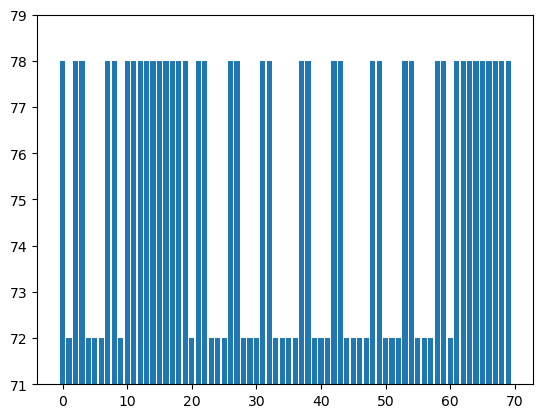

In [16]:
# organize cycles by vertex
cycles_by_vertex = [[] for _ in range(NUM_VERTICES)]
for i, c in enumerate(cycles):
    for v in c[:-1]:
        cycles_by_vertex[v].append(i)

with open('cycles_by_vertex.txt', 'w') as f:
    f.write(f'{max([len(c) for c in cycles_by_vertex])}\n')
    for vertex_cycles in cycles_by_vertex:
        f.write(f'{len(vertex_cycles)} ')
        for c in vertex_cycles:
            f.write(f'{c} ')
        f.write('\n')

# plot as bar graph
plt.bar(range(NUM_VERTICES), [len(c) for c in cycles_by_vertex])
plt.ylim(min([len(c) for c in cycles_by_vertex]) - 1, max([len(c) for c in cycles_by_vertex]) + 1)
plt.show()